<a href="https://colab.research.google.com/github/dimasadhinugroho888/Analisis-Data-Indeks-Standar-Pencemar-Udara-ISPU-di-Provinsi-DKI-Jakarta/blob/main/Analisis_Data_Indeks_Standar_Pencemar_Udara_(ISPU)_di_Provinsi_DKI_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⏳ Silakan upload kembali file data ISPU (format .xlsx atau .csv) Anda untuk analisis final.


Saving data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(1759724488573).xlsx to data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(1759724488573).xlsx
✅ Data 'data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(1759724488573).xlsx' berhasil dimuat (2890 baris).
✅ Data Cleaning dan Pengolahan Selesai.
--------------------------------------------------


################################################################
          DASHBOARD KOMPREHENSIF KUALITAS UDARA DKI JAKARTA          
################################################################



/tmp/ipython-input-641351396.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=critical_param_counts.index, y=critical_param_counts.values, ax=axes[1], palette="flare")


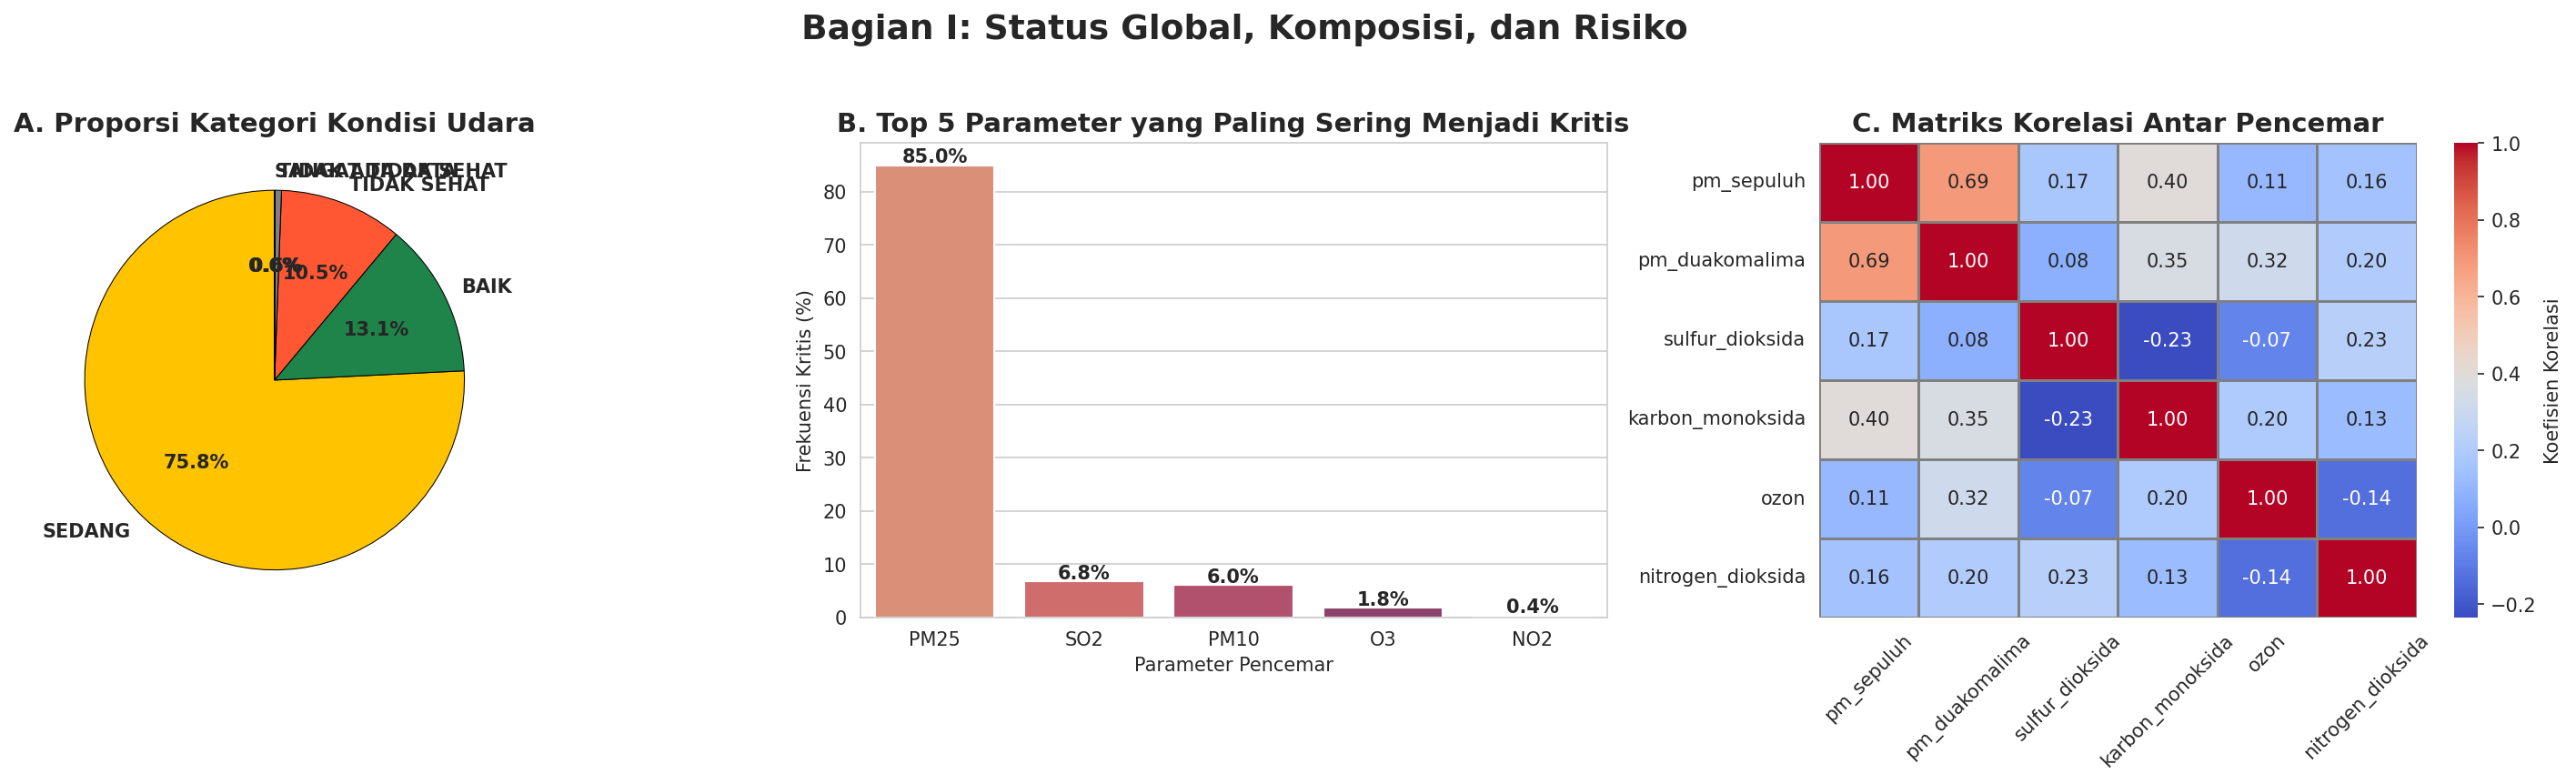

**Insight Baris 1:** Sebanyak **10.59%** hari tercatat 'Tidak Sehat'. PM2.5/PM10 mendominasi penyebab kritis, dan korelasinya sangat tinggi.
--------------------------------------------------


/tmp/ipython-input-641351396.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hari', y='max', data=avg_ispu_by_day, palette="viridis", ax=axes[1])


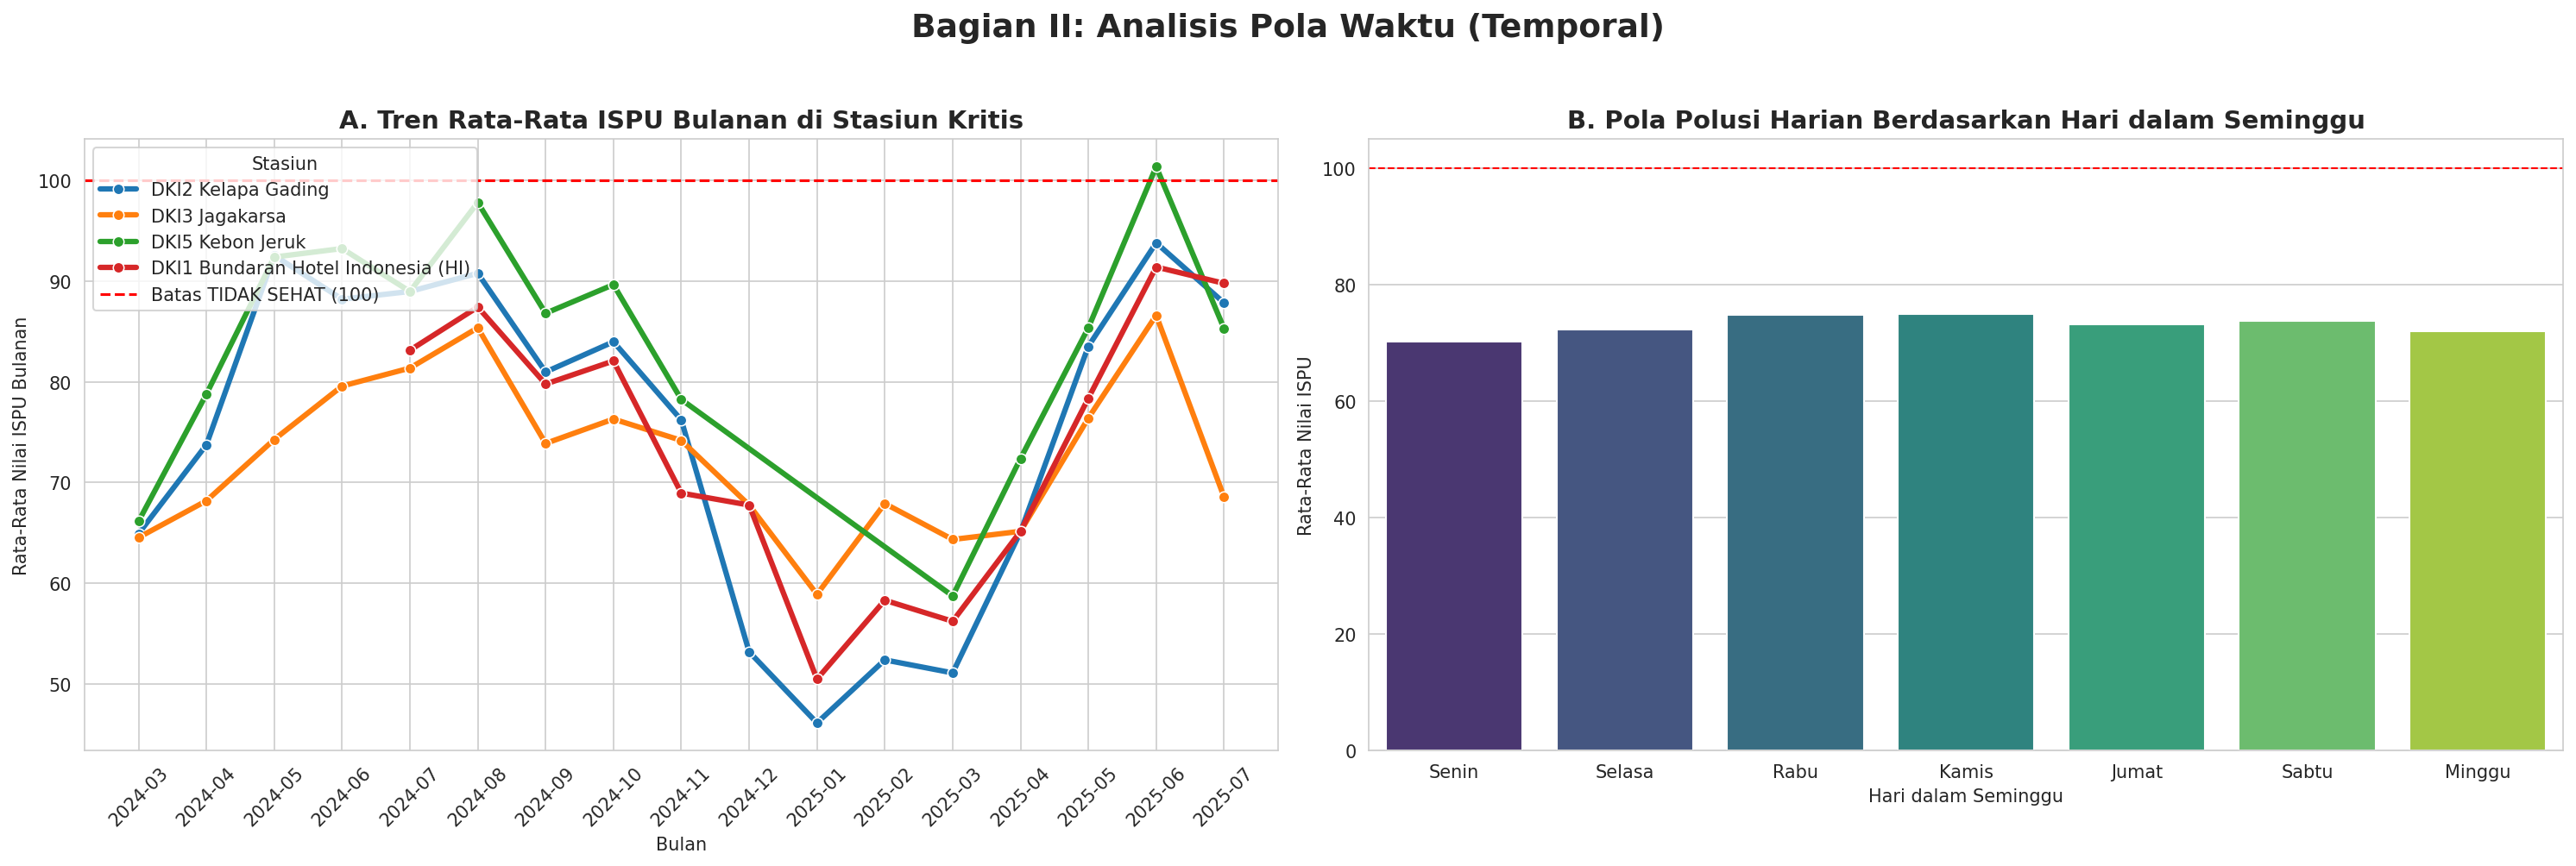

 **Insight Baris 2:** Tren bulanan menunjukkan variasi musiman, sementara Pola Mingguan mengungkapkan dampak dari aktivitas kerja/lalu lintas (misalnya, ISPU tertinggi pada hari kerja).
--------------------------------------------------


/tmp/ipython-input-641351396.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=global_avg_pollutants.index, y=global_avg_pollutants.values, palette="rocket", ax=axes[0])
/tmp/ipython-input-641351396.py:171: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-641351396.py:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='max', y='stasiun', data=station_avg_ispu, palette="RdYlBu_r", ax=axes[1])


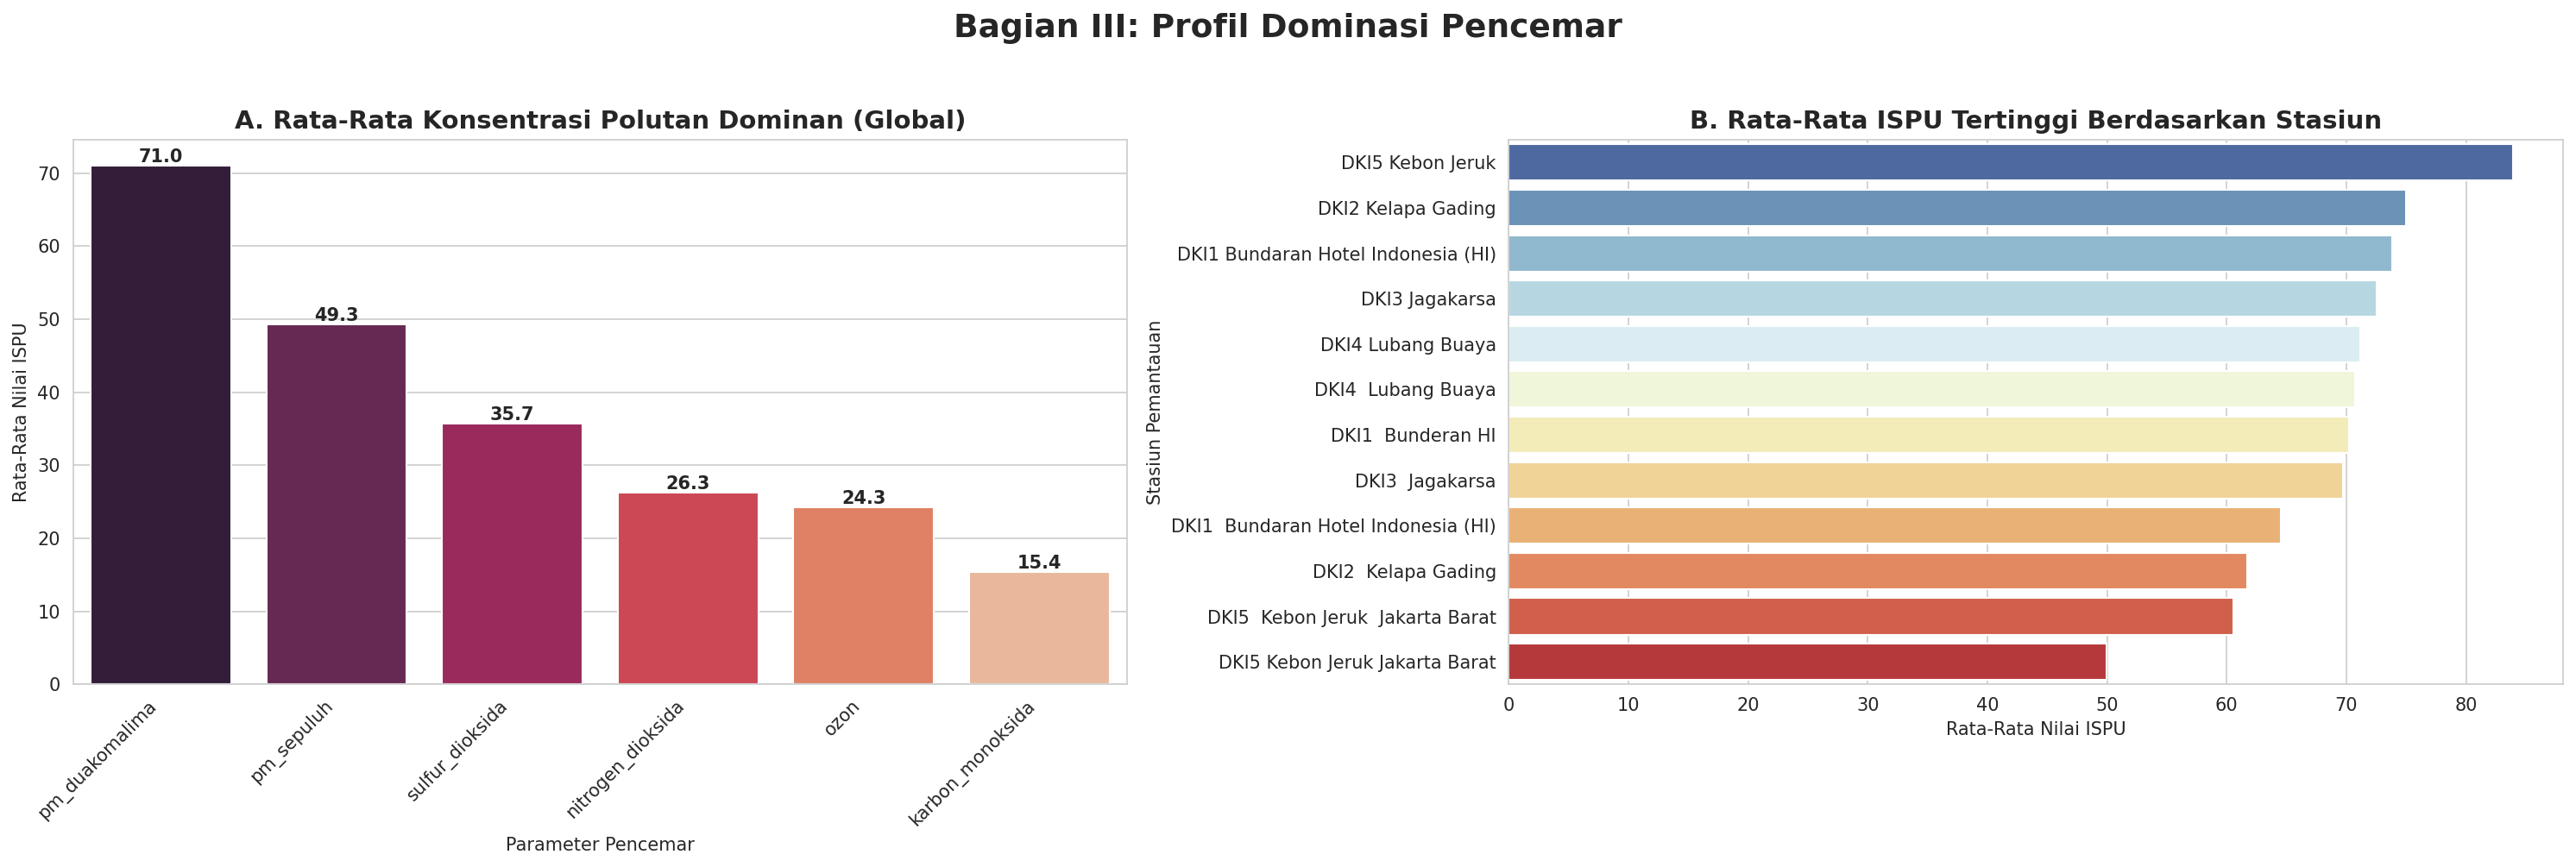

--------------------------------------------------


/tmp/ipython-input-641351396.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/tmp/ipython-input-641351396.py:205: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-641351396.py:205: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-641351396.py:205: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


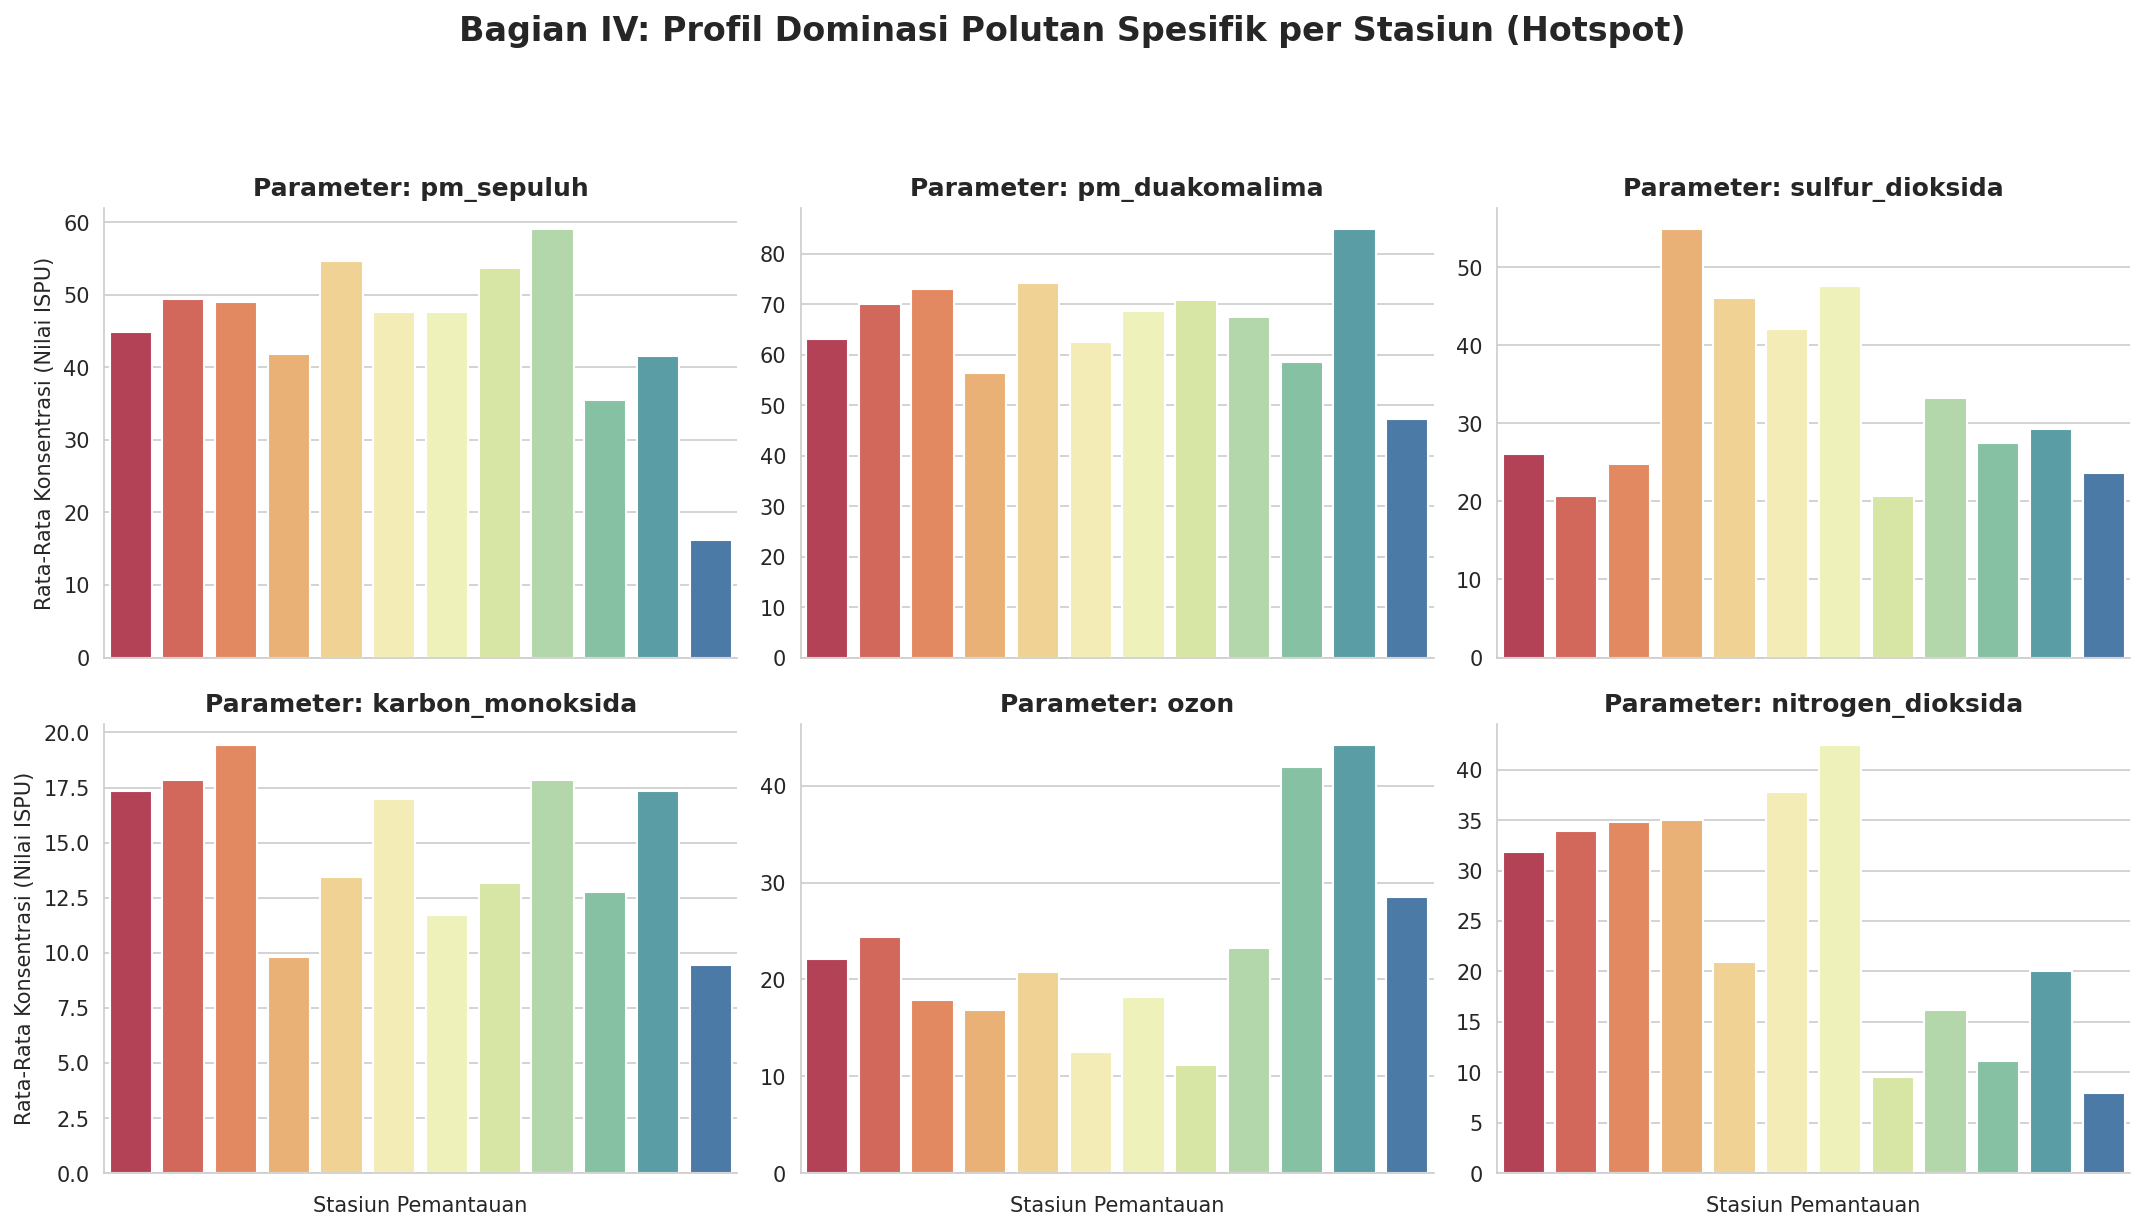


################################################################
                  ANALISIS DASHBOARD SELESAI                  
################################################################

**Rangkuman Kesimpulan Utama:**
1. **Risiko:** 10.59% dari hari tercatat berada dalam kondisi 'Tidak Sehat' (ISPU > 100).
2. **Pencemar Dominan:** Polutan yang memiliki rata-rata nilai ISPU tertinggi secara global adalah yang teratas pada Bar Plot A (Bagian III). Ini menunjukkan fokus utama mitigasi.
3. **Hotspot Waktu:** Tren Bulanan (Bagian II-A) mengungkapkan bulan/musim terburuk, dan Pola Mingguan (Bagian II-B) mengindikasikan apakah polusi didorong oleh aktivitas harian.
4. **Hotspot Lokasi:** Plot terakhir (Bagian IV) memetakan polutan spesifik (misalnya PM2.5) ke stasiun terburuk, memungkinkan kebijakan yang ditargetkan.


In [3]:
# ==============================================================================
# 1. SETUP LIBRARY DAN FUNGSI UPLOAD DATA
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Konfigurasi Tampilan Plot
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.titlesize'] = 14
pd.set_option('display.float_format', '{:.2f}'.format)
category_colors = {'BAIK': '#1E8449', 'SEDANG': '#FFC300', 'TIDAK SEHAT': '#FF5733', 'SANGAT TIDAK SEHAT': '#900C3F', 'BERBAHAYA': '#C70039'}


# ==============================================================================
# 2. PEMUATAN DATA VIA UPLOAD FILE (Mendukung XLSX dan CSV)
# ==============================================================================
print("⏳ Silakan upload kembali file data ISPU (format .xlsx atau .csv) Anda untuk analisis final.")
uploaded = files.upload()

df = None

if uploaded:
    file_name = next(iter(uploaded))

    try:
        if file_name.lower().endswith(('.xls', '.xlsx')):
            df = pd.read_excel(file_name)
        else:
            # Fallback untuk CSV dengan encoding robust
            df = pd.read_csv(file_name, encoding='latin-1')
            print("⚠️ File diidentifikasi sebagai CSV. Menggunakan read_csv (latin-1).")

        if df is not None:
            print(f"✅ Data '{file_name}' berhasil dimuat ({df.shape[0]} baris).")

    except Exception as e:
        print(f"❌ Error fatal saat membaca file: {e}")
        print("Analisis dihentikan karena kegagalan memuat data.")
        exit()
else:
    print("❌ Tidak ada file yang di-upload. Analisis dibatalkan.")
    exit()

if df is None:
    exit()

# ==============================================================================
# 3. DATA CLEANING DAN PRE-PROCESSING
# ==============================================================================
df.replace(['N/A', 'null', 'N/a', '-', '#VALUE!', 'N/A '], np.nan, inplace=True)
ispu_cols = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max']

for col in ispu_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Membuat kolom Tanggal dan Waktu
df['tanggal_str'] = df['periode_data'].astype(str) + df['tanggal'].astype(str).str.zfill(2)
df['Tanggal'] = pd.to_datetime(df['tanggal_str'], format='%Y%m%d', errors='coerce')
df.dropna(subset=['Tanggal'], inplace=True)
df.sort_values(by='Tanggal', inplace=True)
df['Bulan_Tahun'] = df['Tanggal'].dt.to_period('M')
df['Hari_Angka'] = df['Tanggal'].dt.dayofweek
hari_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hari_nama_indonesia = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
hari_map = dict(zip(df['Tanggal'].dt.strftime('%A').unique(), hari_nama_indonesia))
df['Hari'] = df['Tanggal'].dt.strftime('%A').map(hari_map)

print("✅ Data Cleaning dan Pengolahan Selesai.")
print("-" * 50)


# ==============================================================================
# 4. ANALISIS UTAMA & METRIK KRITIS
# ==============================================================================
unhealthy_days = df[df['max'] > 100].shape[0]
total_days = df.shape[0]
unhealthy_percent = (unhealthy_days / total_days) * 100 if total_days > 0 else 0
top_stations = df.groupby('stasiun')['max'].mean().nlargest(4).index.tolist()
df_filtered_trend = df[df['stasiun'].isin(top_stations)]
parameter_cols = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']


print("\n\n################################################################")
print("          DASHBOARD KOMPREHENSIF KUALITAS UDARA DKI JAKARTA          ")
print("################################################################\n")

# --- BARIS 1: RINGKASAN STATUS & KOMPOSISI PENCEMAR ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Bagian I: Status Global, Komposisi, dan Risiko', fontsize=18, weight='bold')

# Plot 1A: Distribusi Kategori ISPU (Pie Chart)
category_counts = df['kategori'].value_counts()
colors = [category_colors.get(label, 'gray') for label in category_counts.index]
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, textprops={'fontsize': 10, 'weight': 'bold'})
axes[0].set_title('A. Proporsi Kategori Kondisi Udara', fontsize=14, weight='bold')

# Plot 1B: Parameter Kritis Paling Sering Muncul
critical_param_counts = df['parameter_pencemar_kritis'].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(5)
sns.barplot(x=critical_param_counts.index, y=critical_param_counts.values, ax=axes[1], palette="flare")
for i, v in enumerate(critical_param_counts.values):
    axes[1].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight='bold')
axes[1].set_title('B. Top 5 Parameter yang Paling Sering Menjadi Kritis', fontsize=14, weight='bold')
axes[1].set_xlabel('Parameter Pencemar')
axes[1].set_ylabel('Frekuensi Kritis (%)')

# Plot 1C: Matriks Korelasi (Hubungan Antar Polutan)
correlation_matrix = df[ispu_cols[:-1]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='gray',
            cbar_kws={'label': 'Koefisien Korelasi'}, ax=axes[2])
axes[2].set_title('C. Matriks Korelasi Antar Pencemar', fontsize=14, weight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='y', rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print(f"**Insight Baris 1:** Sebanyak **{unhealthy_percent:.2f}%** hari tercatat 'Tidak Sehat'. PM2.5/PM10 mendominasi penyebab kritis, dan korelasinya sangat tinggi.")
print("-" * 50)


# --- BARIS 2: TREN TEMPORAL DAN POLA MINGGUAN ---
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Bagian II: Analisis Pola Waktu (Temporal)', fontsize=18, weight='bold')

# Plot 2A: Tren Bulanan Rata-Rata di Stasiun Kritis
monthly_avg_station = df_filtered_trend.groupby(['Bulan_Tahun', 'stasiun'])['max'].mean().reset_index()
monthly_avg_station['Bulan_Tahun'] = monthly_avg_station['Bulan_Tahun'].astype(str)

sns.lineplot(x='Bulan_Tahun', y='max', hue='stasiun', data=monthly_avg_station, linewidth=3, marker='o', ax=axes[0])
axes[0].axhline(y=100, color='red', linestyle='--', linewidth=1.5, label='Batas TIDAK SEHAT (100)')
axes[0].set_title(f'A. Tren Rata-Rata ISPU Bulanan di Stasiun Kritis', fontsize=14, weight='bold')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Rata-Rata Nilai ISPU Bulanan')
axes[0].legend(title='Stasiun', loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2B: Pola Polusi Harian (Hari dalam Seminggu)
avg_ispu_by_day = df.groupby(['Hari_Angka', 'Hari'])['max'].mean().reset_index()
avg_ispu_by_day.sort_values(by='Hari_Angka', inplace=True)
sns.barplot(x='Hari', y='max', data=avg_ispu_by_day, palette="viridis", ax=axes[1])
axes[1].axhline(y=100, color='red', linestyle='--', linewidth=1, label='Batas Tidak Sehat (100)')
axes[1].set_title('B. Pola Polusi Harian Berdasarkan Hari dalam Seminggu', fontsize=14, weight='bold')
axes[1].set_xlabel('Hari dalam Seminggu')
axes[1].set_ylabel('Rata-Rata Nilai ISPU')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print(" **Insight Baris 2:** Tren bulanan menunjukkan variasi musiman, sementara Pola Mingguan mengungkapkan dampak dari aktivitas kerja/lalu lintas (misalnya, ISPU tertinggi pada hari kerja).")
print("-" * 50)


# --- BARIS 3: FOKUS DOMINASI PENCEMAR DAN SPASIAL ---
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Bagian III: Profil Dominasi Pencemar', fontsize=18, weight='bold')

# Plot 3A: Rata-Rata Konsentrasi Tertinggi Seluruh Jakarta (Dominasi Global)
global_avg_pollutants = df[parameter_cols].mean().sort_values(ascending=False)
sns.barplot(x=global_avg_pollutants.index, y=global_avg_pollutants.values, palette="rocket", ax=axes[0])

for i, v in enumerate(global_avg_pollutants.values):
    axes[0].text(i, v + 0.5, f"{v:.1f}", ha='center', fontsize=10, weight='bold')
axes[0].set_title('A. Rata-Rata Konsentrasi Polutan Dominan (Global)', fontsize=14, weight='bold')
axes[0].set_xlabel('Parameter Pencemar')
axes[0].set_ylabel('Rata-Rata Nilai ISPU')
# --- PERBAIKAN: Menggunakan set_xticklabels untuk rotasi dan alignment ---
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot 3B: Rata-Rata ISPU per Stasiun (Analisis Spasial)
station_avg_ispu = df.groupby('stasiun')['max'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='max', y='stasiun', data=station_avg_ispu, palette="RdYlBu_r", ax=axes[1])
axes[1].set_title('B. Rata-Rata ISPU Tertinggi Berdasarkan Stasiun', fontsize=14, weight='bold')
axes[1].set_xlabel('Rata-Rata Nilai ISPU')
axes[1].set_ylabel('Stasiun Pemantauan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("-" * 50)
# --- VISUALISASI TAMBAHAN (SPASIAL MENDALAM) ---
# Plot 4: Profil Konsentrasi Pencemar Kritis per Stasiun
spatial_pollutant_profile = df.groupby('stasiun')[parameter_cols].mean().reset_index()
spatial_pollutant_long = pd.melt(spatial_pollutant_profile,
                                id_vars='stasiun',
                                value_vars=parameter_cols,
                                var_name='Parameter',
                                value_name='Rata_Rata_Konsentrasi')

g = sns.catplot(
    data=spatial_pollutant_long, x='stasiun', y='Rata_Rata_Konsentrasi', col='Parameter',
    kind='bar', palette='Spectral', sharey=False, col_wrap=3, height=4, aspect=1.2
)

g.fig.suptitle('Bagian IV: Profil Dominasi Polutan Spesifik per Stasiun (Hotspot)',
               fontsize=16, weight='bold', y=1.05)
g.set_titles("Parameter: {col_name}", size=12, weight='bold')
g.set_axis_labels("Stasiun Pemantauan", "Rata-Rata Konsentrasi (Nilai ISPU)")

for ax in g.axes.flat:
    # --- PERBAIKAN: Menggunakan tick_params untuk rotasi saja, atau set_xticklabels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

print("\n################################################################")
print("                  ANALISIS DASHBOARD SELESAI                  ")
print("################################################################")
print("\n**Rangkuman Kesimpulan Utama:**")
print(f"1. **Risiko:** {unhealthy_percent:.2f}% dari hari tercatat berada dalam kondisi 'Tidak Sehat' (ISPU > 100).")
print(f"2. **Pencemar Dominan:** Polutan yang memiliki rata-rata nilai ISPU tertinggi secara global adalah yang teratas pada Bar Plot A (Bagian III). Ini menunjukkan fokus utama mitigasi.")
print(f"3. **Hotspot Waktu:** Tren Bulanan (Bagian II-A) mengungkapkan bulan/musim terburuk, dan Pola Mingguan (Bagian II-B) mengindikasikan apakah polusi didorong oleh aktivitas harian.")
print(f"4. **Hotspot Lokasi:** Plot terakhir (Bagian IV) memetakan polutan spesifik (misalnya PM2.5) ke stasiun terburuk, memungkinkan kebijakan yang ditargetkan.")